919.7611694335938
843.0494384765625
737.9169311523438
601.658447265625
478.019775390625
403.91326904296875
347.5983581542969
278.934326171875
201.4267120361328
136.0551300048828


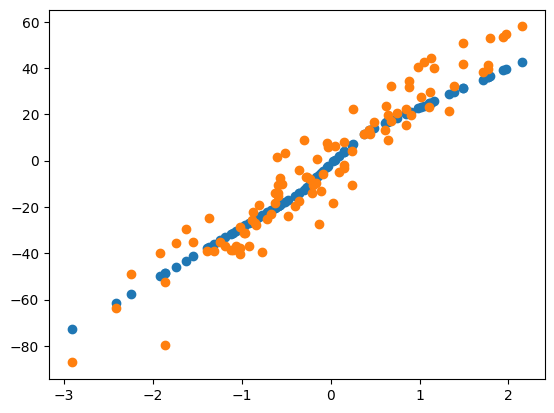

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = torch.nn.Linear(1, 10)
        self.relu1 = torch.nn.ReLU()
        self.l2 = torch.nn.Linear(10, 1)
    def forward(self, x):
        out = self.l1(x)
        out = self.relu1(out)
        out = self.l2(out)
        return out

if __name__ == "__main__":
    X, Y = make_regression(100, n_features = 1, n_targets = 1, noise = 10, random_state = 3)
    Y = Y.reshape(100, 1)
    
    X = torch.from_numpy(X.astype(np.float32))
    Y = torch.from_numpy(Y.astype(np.float32))
    
    model = Model()
    optimizer = torch.optim.SGD(model.parameters(), 0.01)
    lossFunc = torch.nn.MSELoss()
    for i in range(10):
        prediction = model(X)
        loss = lossFunc(prediction, Y)
        print(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    prediction = model(X).detach().numpy()
    plt.scatter(X, prediction)
    plt.scatter(X, Y)
    plt.show()

961.8604125976562
882.2654418945312
788.391845703125
647.7587280273438
467.1622314453125
300.2999267578125
187.6143035888672
120.96076202392578
93.77269744873047
87.61993408203125


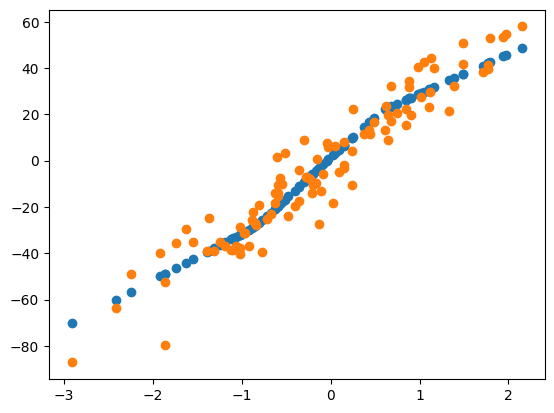

In [22]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

if __name__ == "__main__":
    X, Y = make_regression(100, n_features = 1, n_targets = 1, noise = 10, random_state = 3)
    Y = Y.reshape(100, 1)
    
    X = torch.from_numpy(X.astype(np.float32))
    Y = torch.from_numpy(Y.astype(np.float32))

    # optimizer = torch.optim.SGD(model.parameters(), 0.01)
    lossFunc = torch.nn.MSELoss()
    l1 = torch.nn.Linear(1, 10)
    relu1 = torch.nn.ReLU()
    l2 = torch.nn.Linear(10, 1)
    for i in range(10):
        # prediction = model(X)
        out = l1(X)
        out = relu1(out)
        out = l2(out)
        loss = lossFunc(out, Y)
        print(loss.item())
        # optimizer.zero_grad()
        loss.backward()
        l1.weight = torch.nn.Parameter(l1.weight - 0.01 * l1.weight.grad)
        l1.bias = torch.nn.Parameter(l1.bias - 0.01 * l1.bias.grad)
        
        l2.weight = torch.nn.Parameter(l2.weight - 0.01 * l2.weight.grad)
        l2.bias = torch.nn.Parameter(l2.bias - 0.01 * l2.bias.grad)
        # optimizer.step()
    
    out = l1(X)
    out = relu1(out)
    out = l2(out)
    prediction = out.detach().numpy()
    plt.scatter(X, prediction)
    plt.scatter(X, Y)
    plt.show()

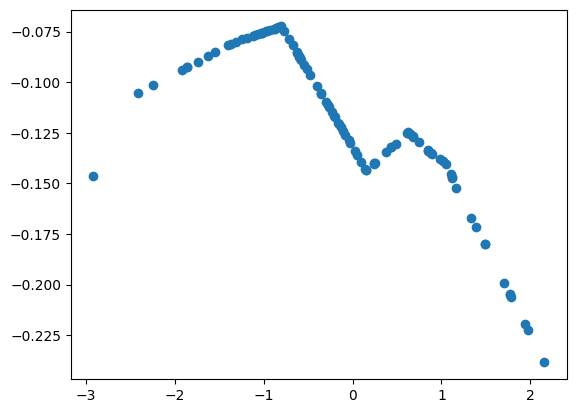

In [20]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

if __name__ == "__main__":
    X, Y = make_regression(100, n_features = 1, n_targets = 1, noise = 10, random_state = 3)
    Y = Y.reshape(100, 1)
    
    X = torch.from_numpy(X.astype(np.float32))
    Y = torch.from_numpy(Y.astype(np.float32))

    # optimizer = torch.optim.SGD(model.parameters(), 0.01)
    lossFunc = torch.nn.MSELoss()
    l1 = torch.nn.Linear(1, 10)
    relu1 = torch.nn.ReLU()
    l2 = torch.nn.Linear(10, 1)
    
    out = l1(X)
    out = relu1(out)
    out = l2(out)
    prediction = out.detach().numpy()
    plt.scatter(X, prediction)
    # plt.scatter(X, Y)
    plt.show()